In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Obtain data
df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/AirPassengers.csv')

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# Clean data
df['Month'] = pd.to_datetime(df['Month']) # change our month to a proper datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
df_indexed = df.set_index(['Month'])
df_indexed

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


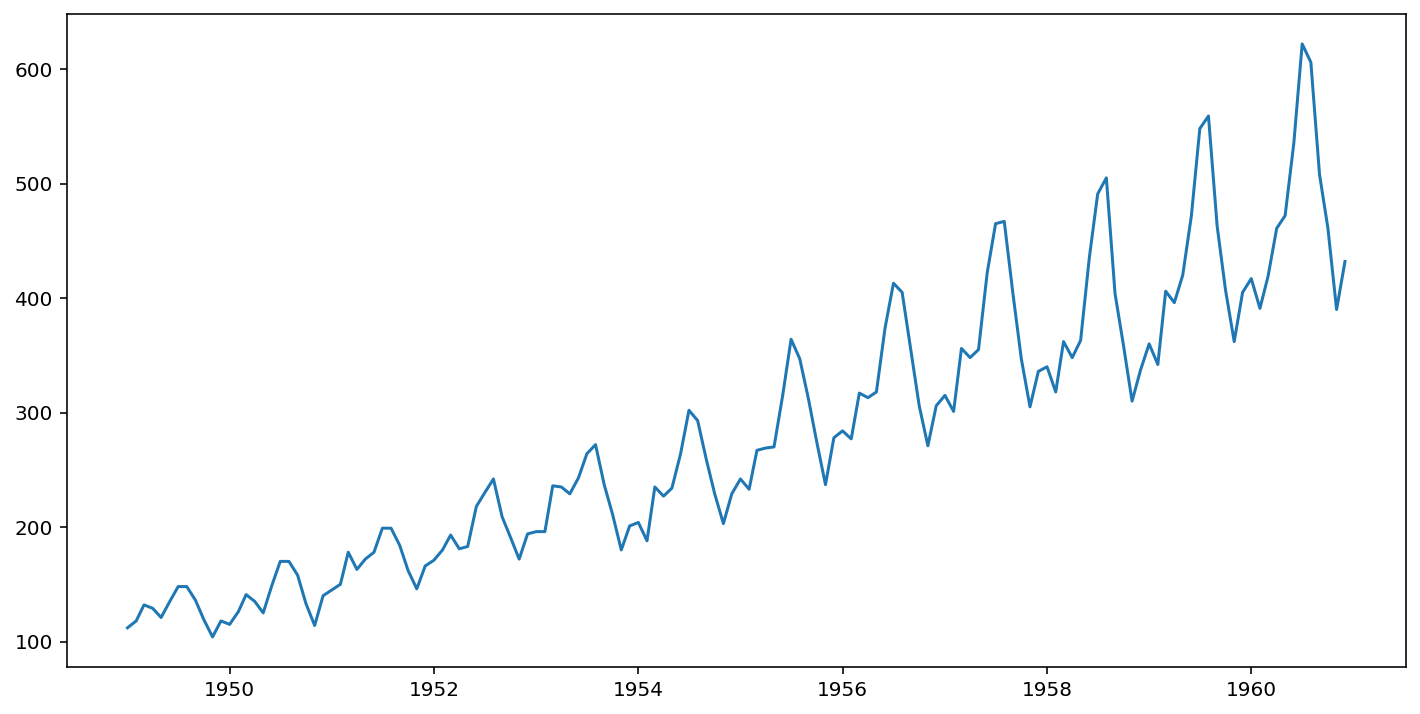

In [14]:
# Exploring data

%config InlineBackend.figure_format = 'retina'
# from matplotlib.pyplot import figure
# figure(figsize=(16, 5), dpi=100)

plt.rcParams["figure.figsize"] = (12,6) # change the figure size
plt.rcParams["figure.dpi"] = 72 # change the resolution
plt.plot(df_indexed);

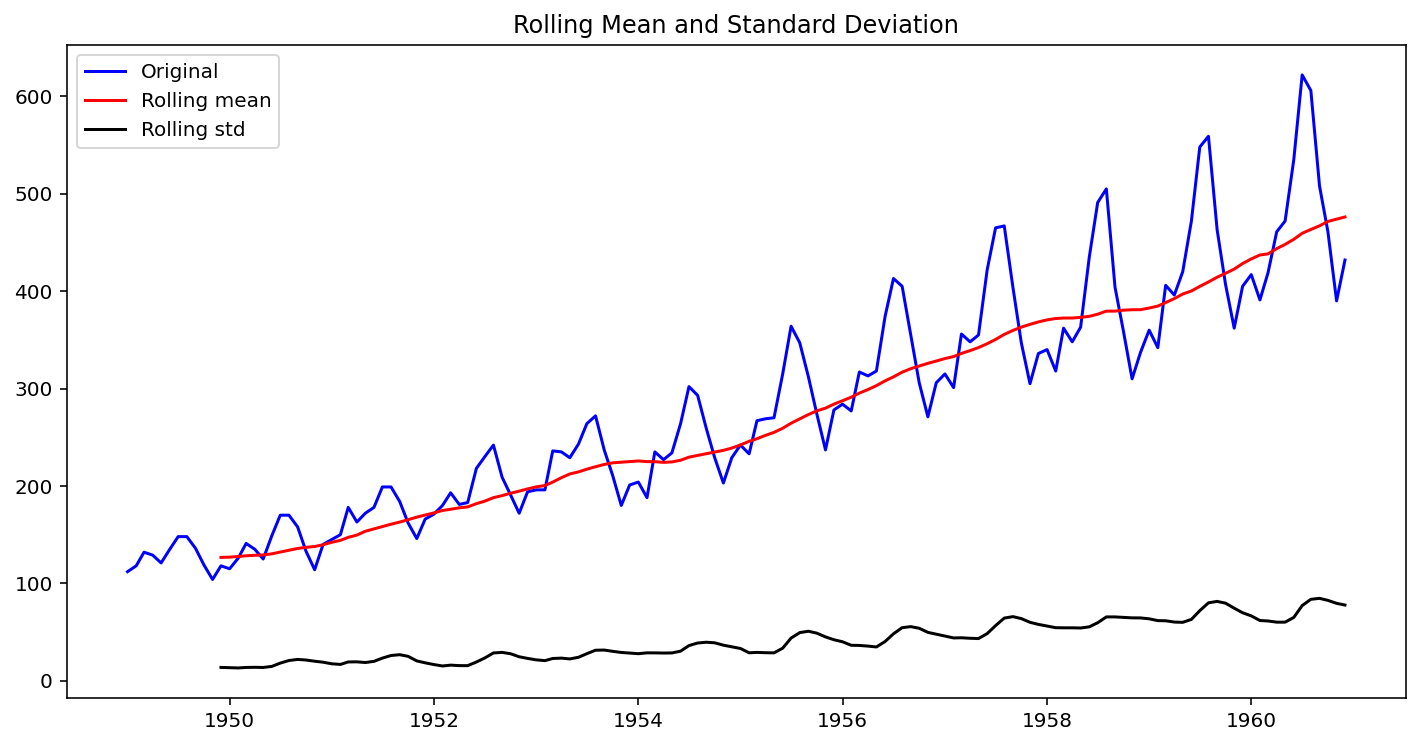

In [18]:
# Test for stationarity

rol_mean = df_indexed.rolling(window=12).mean()
rol_std = df_indexed.rolling(window=12).std()

orig = plt.plot(df_indexed, color='blue', label='Original')
mean = plt.plot(rol_mean, color='red', label='Rolling mean')
std = plt.plot(rol_std, color='black', label='Rolling std')

plt.legend(loc='best') # show the legend, using best location
plt.title('Rolling Mean and Standard Deviation')
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_indexed['#Passengers'])

print(f'ADF Statistics: {adf[0]:f}')
print(f'p-value: {adf[1]:f}')
print(f'The time series is {"non-" if adf[1] > 0.05 else ""}stationary')

ADF Statistics: 0.815369
p-value: 0.991880
The time series is non-stationary


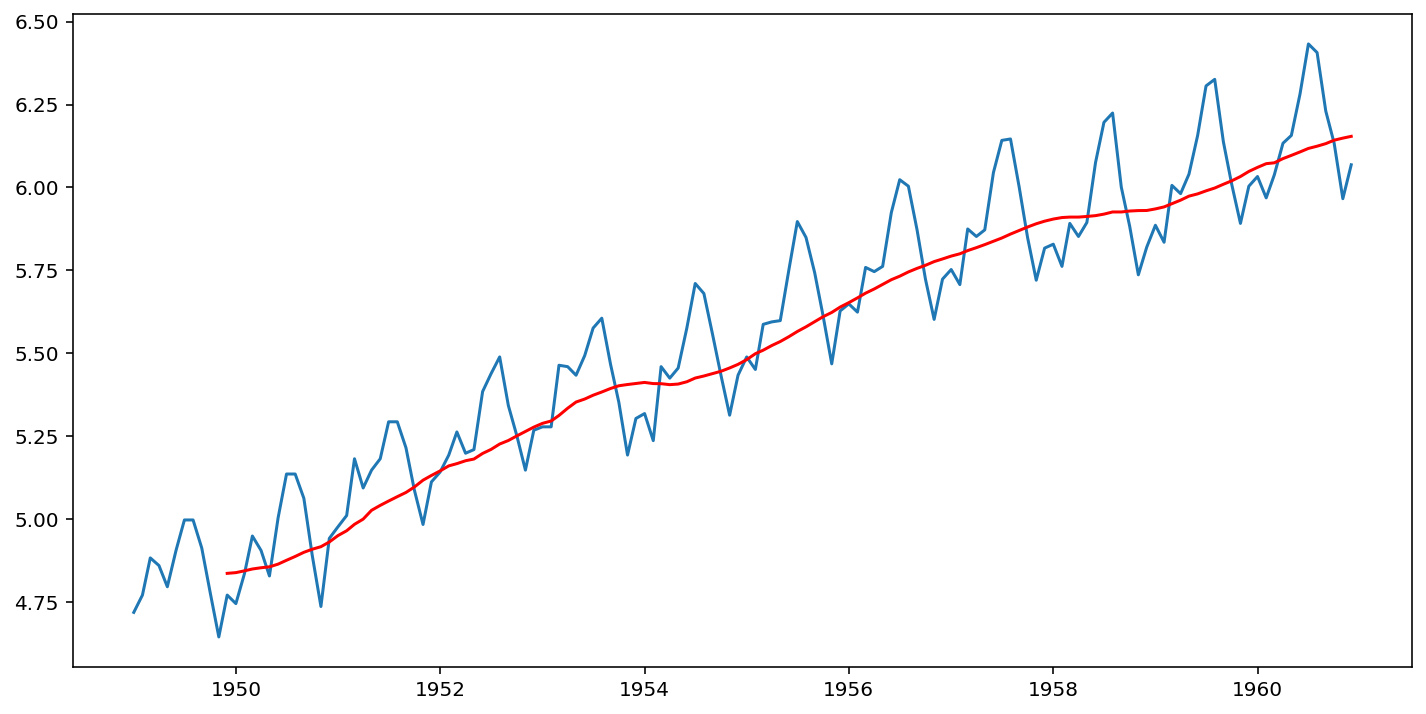

In [28]:
df_indexed_log = np.log(df_indexed)
ma = df_indexed_log.rolling(window=12).mean()

plt.plot(df_indexed_log)
plt.plot(ma, color='red');

In [31]:
df_logminusma = df_indexed_log - ma
df_logminusma.dropna(inplace = True)
df_logminusma

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


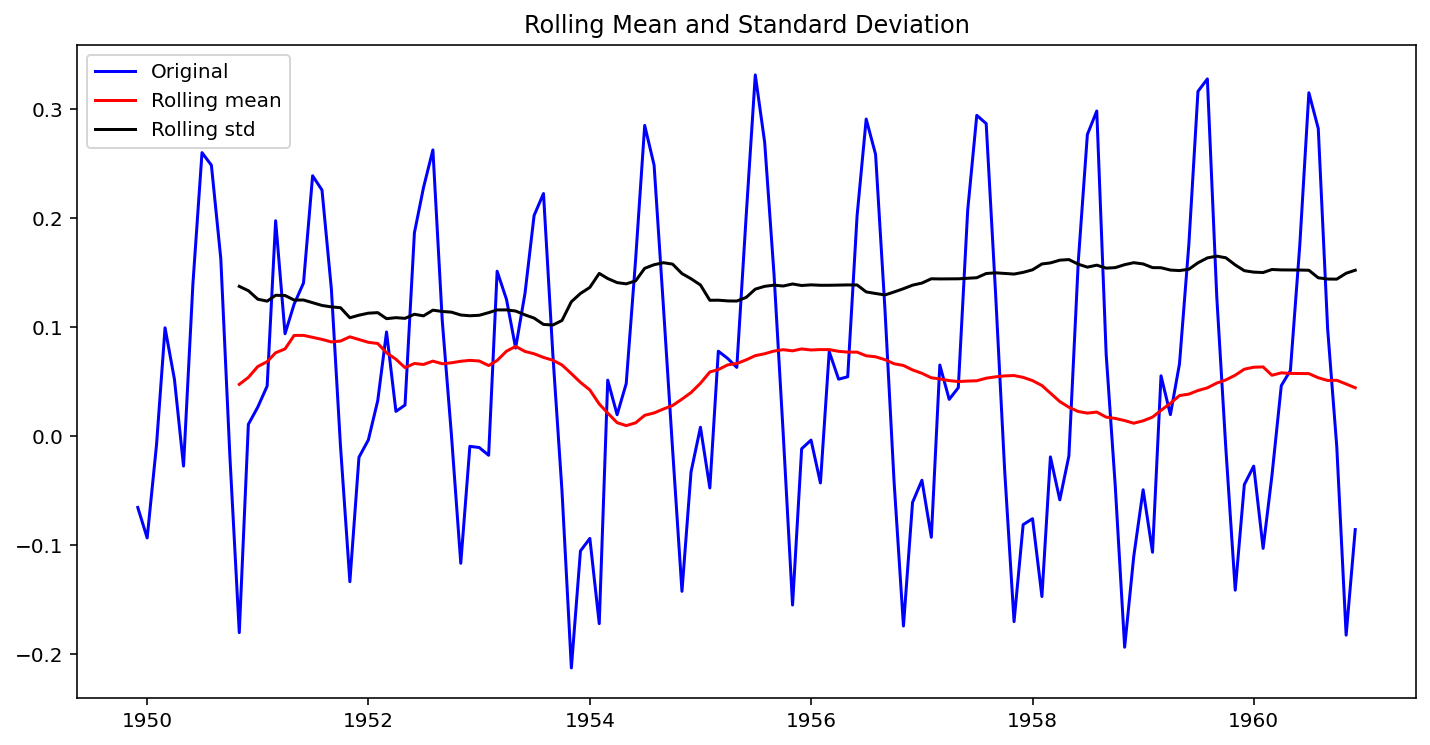

ADF Statistics: -3.162908
p-value: 0.022235
The time series is stationary


In [32]:
def test_stationarity(df_test):
  df_ma = df_test.rolling(window=12).mean()
  df_std = df_test.rolling(window=12).std()
  
  orig = plt.plot(df_test, color='blue', label='Original')
  mean = plt.plot(df_ma, color='red', label='Rolling mean')
  std = plt.plot(df_std, color='black', label='Rolling std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show()
  
  adf = adfuller(df_test['#Passengers'])
  print(f'ADF Statistics: {adf[0]:f}')
  print(f'p-value: {adf[1]:f}')
  print(f'The time series is {"non-" if adf[1] > 0.05 else ""}stationary')
  
test_stationarity(df_logminusma)
  

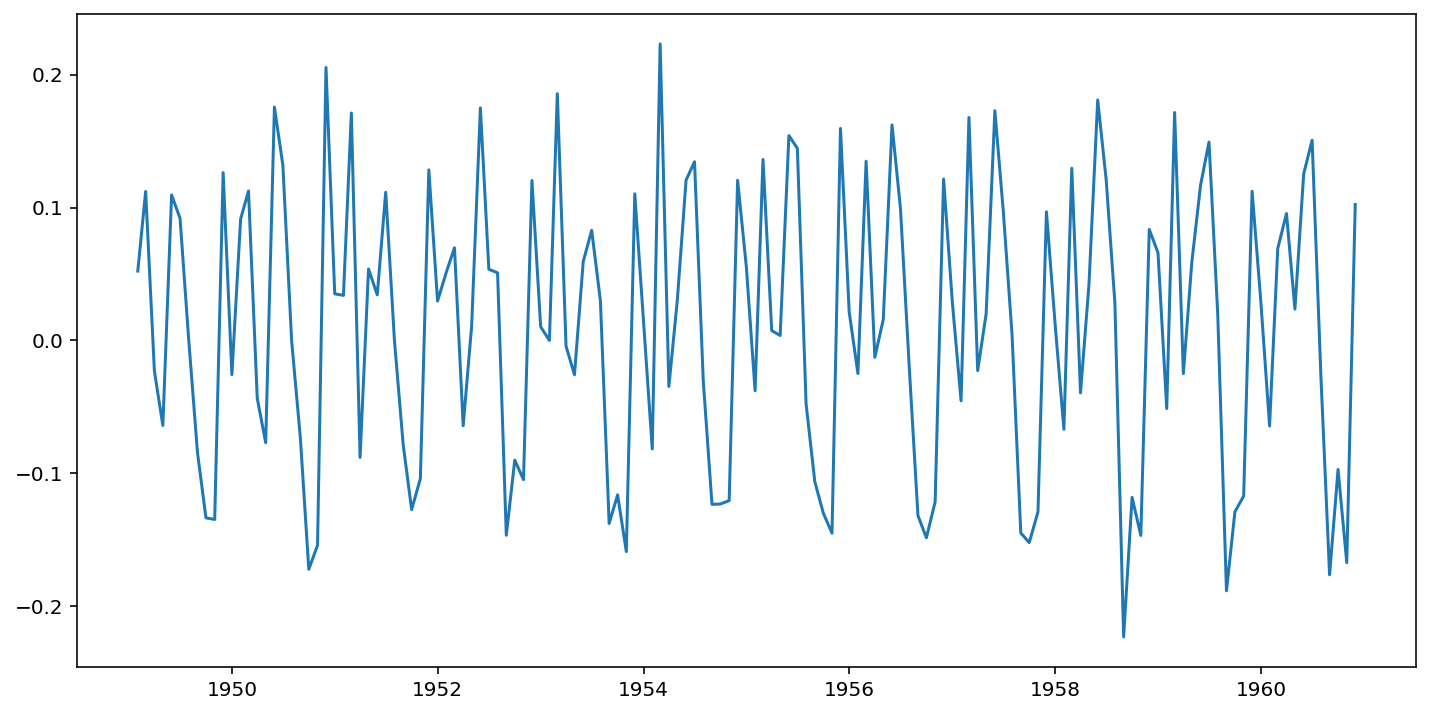

In [36]:
df_logshift = df_indexed_log - df_indexed_log.shift()
df_logshift.dropna(inplace=True)
plt.plot(df_logshift)

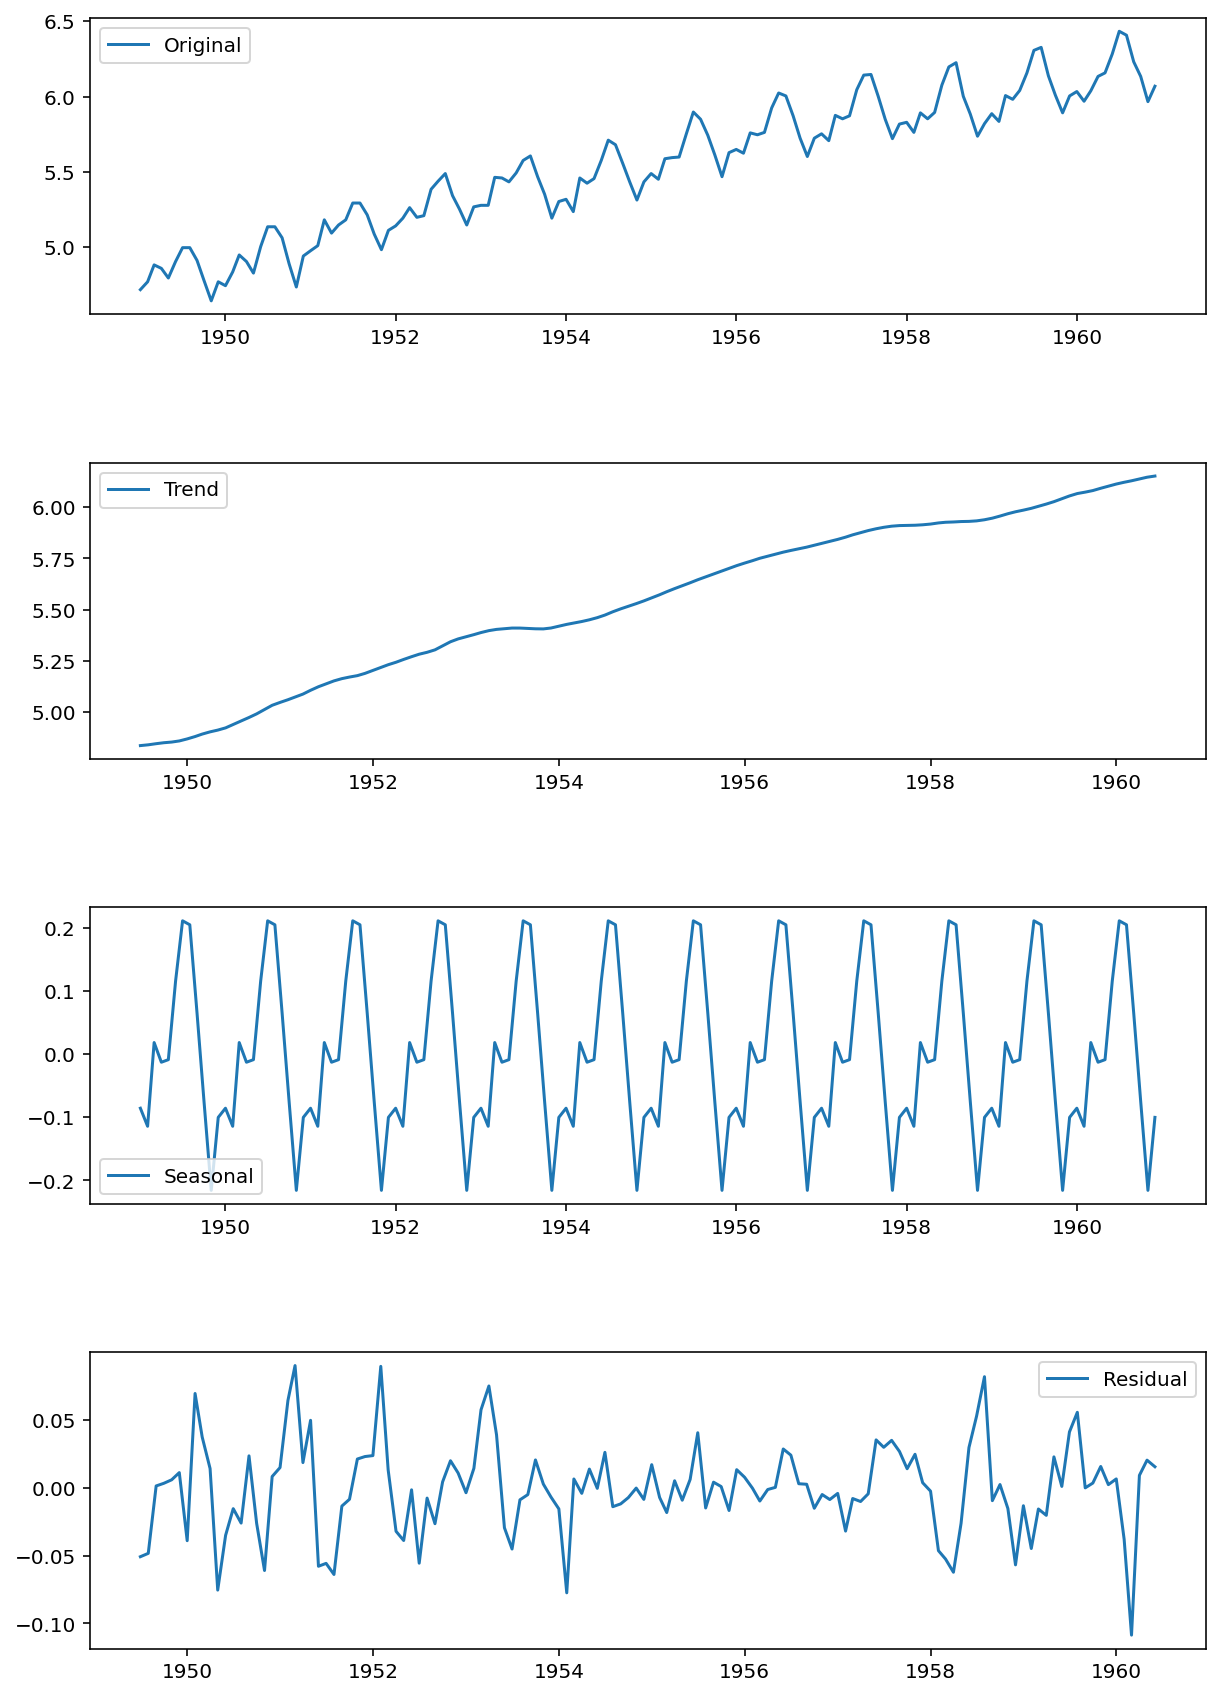

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_log = df_indexed_log

decomp = seasonal_decompose(df_log)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

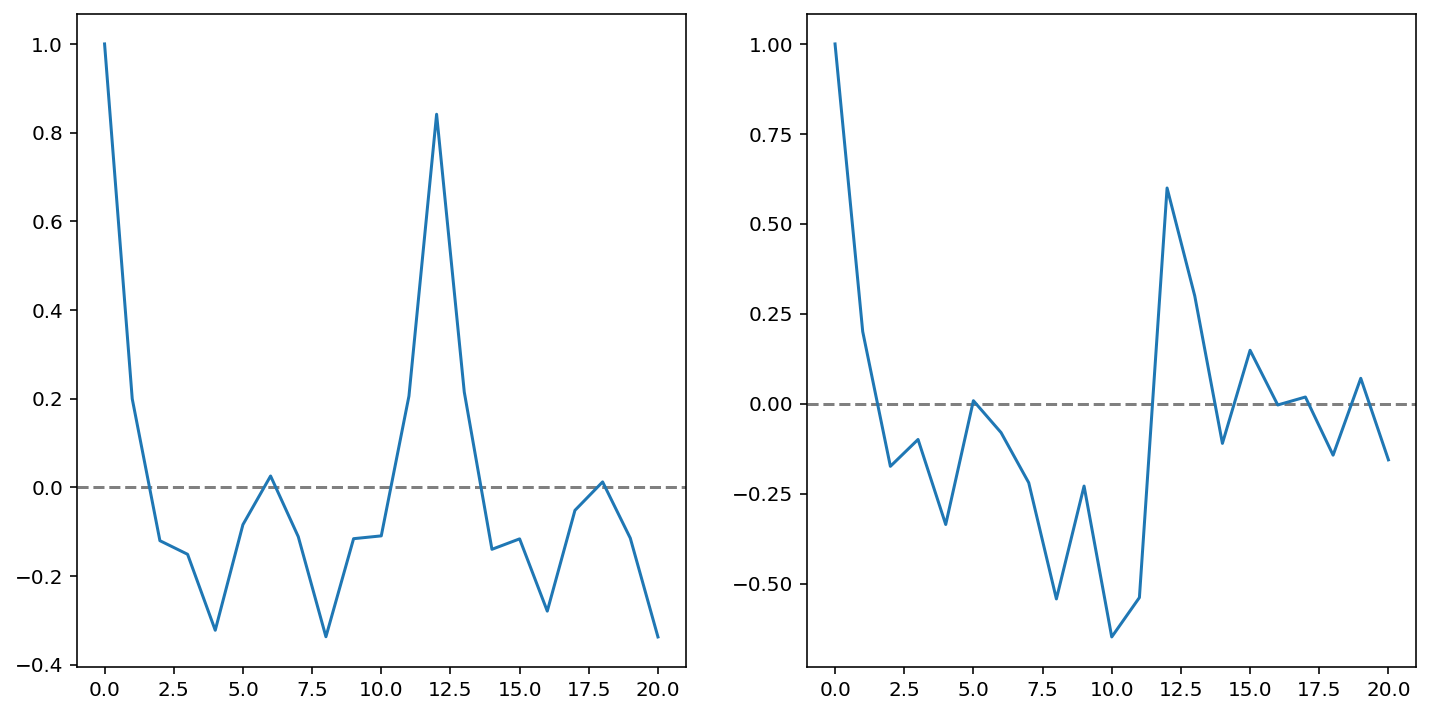

In [44]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_logshift, nlags=20)
lag_pacf = pacf(df_logshift, nlags=20, method="ols")

plt.subplot(121)
plt.axhline(y=0, linestyle='--', color="gray")
plt.plot(lag_acf)

plt.subplot(122)
plt.axhline(y=0, linestyle='--', color="gray")
plt.plot(lag_pacf)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warn

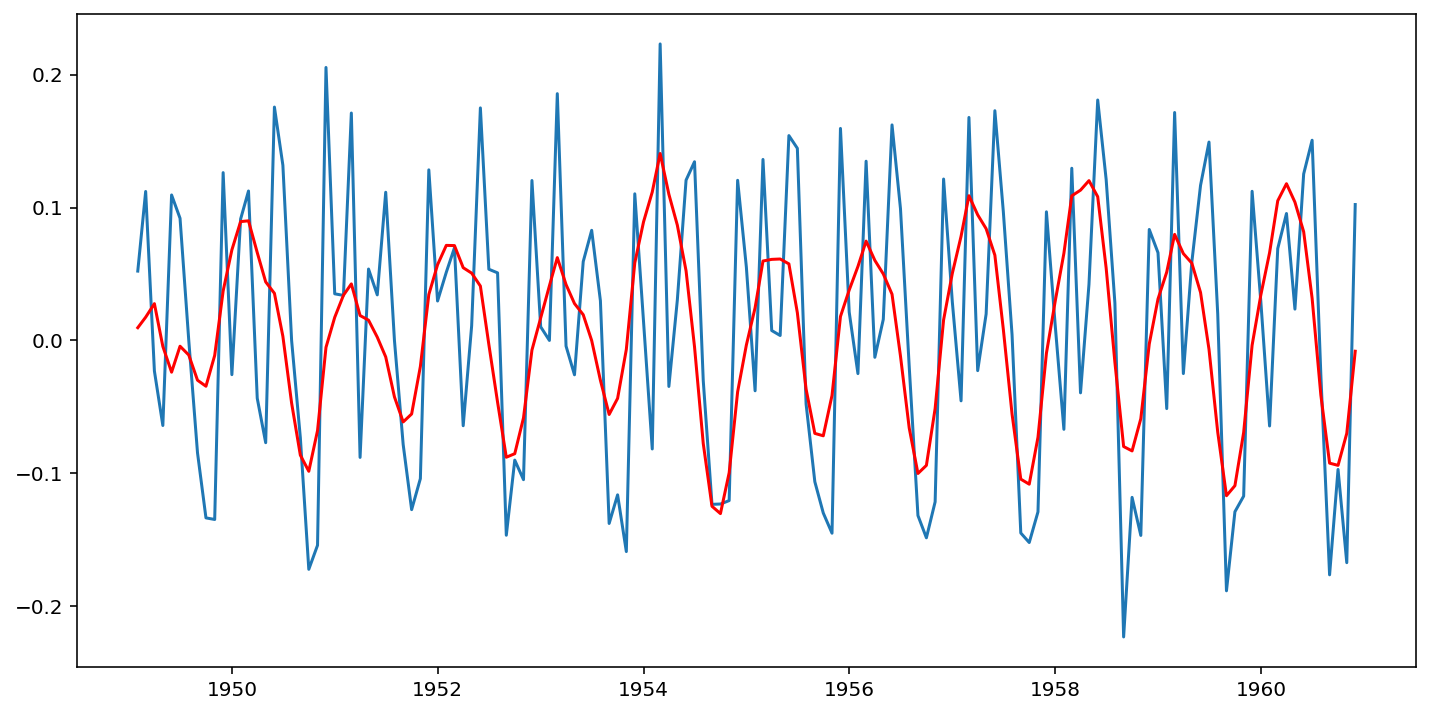

In [48]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_log, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(df_logshift)
plt.plot(results_AR.fittedvalues, color='red')

In [56]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [60]:
predictions_ARIMA_log = pd.Series(df_log['#Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
                ...   
1960-08-01    6.091047
1960-09-01    5.998697
1960-10-01    5.904684
1960-11-01    5.834760
1960-12-01    5.826633
Length: 144, dtype: float64

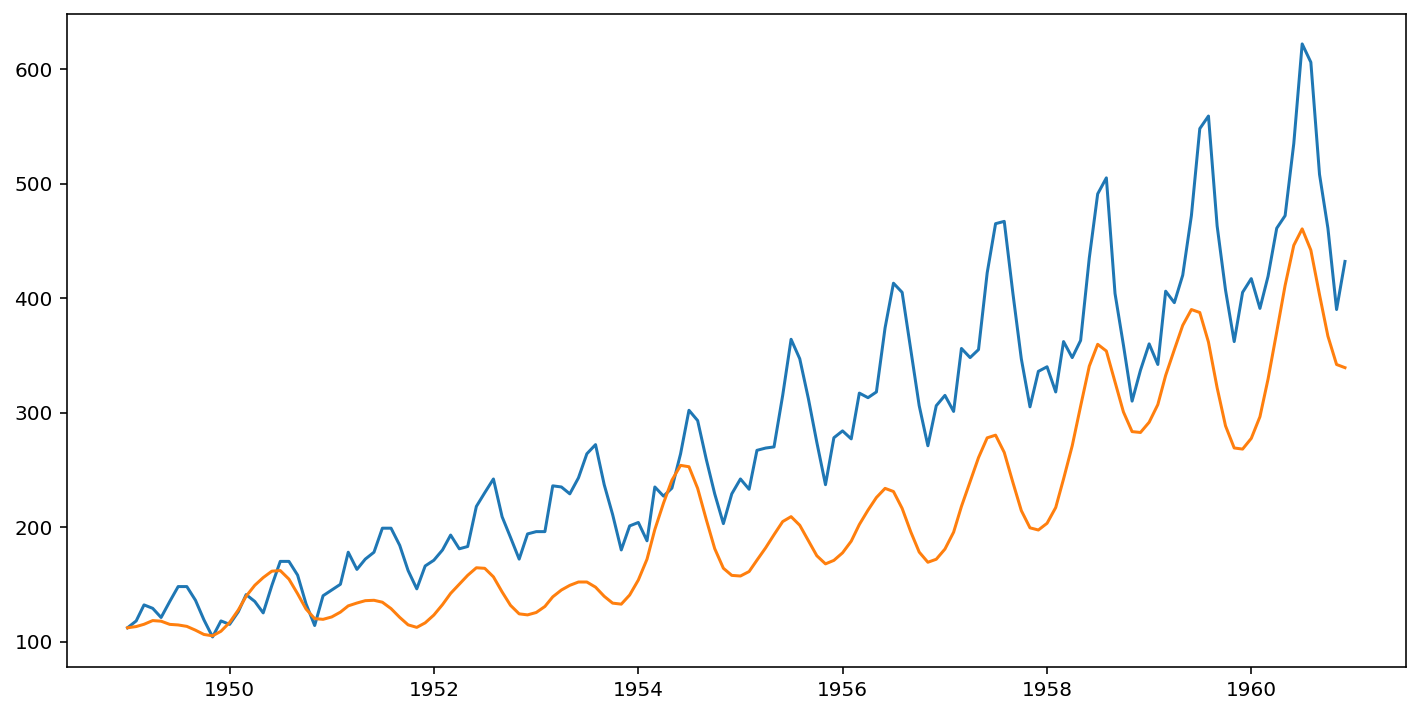

In [61]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_indexed)
plt.plot(predictions_ARIMA)

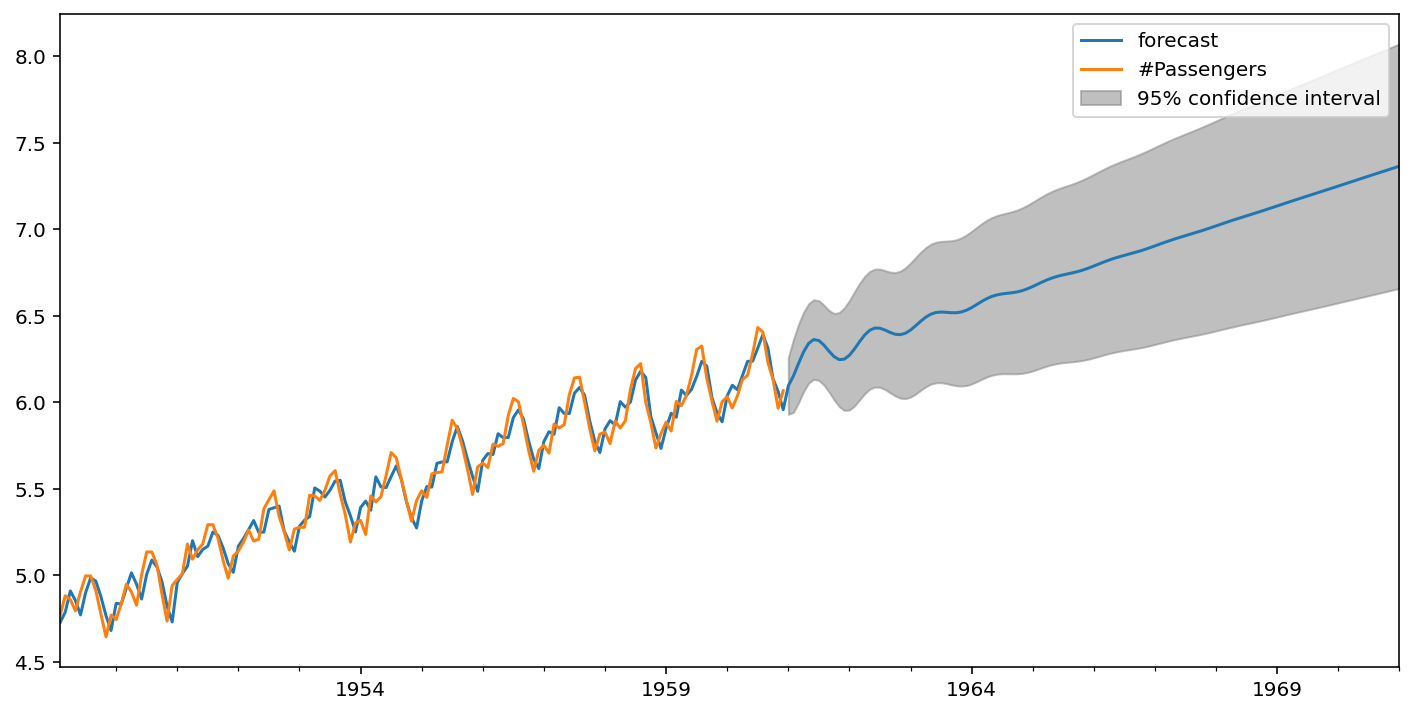

In [63]:
results_AR.plot_predict(1,264)
x = results_AR.forecast(steps=120)